In [1]:
import pandas as pd
import csv
import numpy as np
from numpy import array
from scipy.sparse import csr_matrix
from ast import literal_eval
from collections import Counter
from scipy import sparse
import glob
from scipy.sparse import vstack
from scipy.sparse import hstack
import gc
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain
import random
#import seaborn.apionly
import scipy.stats as sp
import seaborn

# settings

In [2]:
# select which cluster
cluster_id = 1
# cluster_id = 2
# cluster_id = 3
# cluster_id = 4
# cluster_id = 5

# select which K to use
ROI_name = 'kmeans_2clusters_tval_perS.csv'
# ROI_name = 'kmeans_3clusters_tval_perS.csv'
# ROI_name = 'kmeans_4clusters_tval_perS.csv'
# ROI_name = 'kmeans_5clusters_tval_perS.csv'

In [3]:
# input and output directories
input_dir = '/Users/silvycollin/Desktop/per_subject/'
output_dir = '/Users/silvycollin/Desktop/per_subject/'

In [4]:
# read in datafile
dataFile = pd.read_csv(input_dir + ROI_name)

# make dataframe for plotting

In [5]:

# sameSame = within event, within schema
# sameOther = within event, across schema
# otherOther = across event, across schema
# otherSame = across event, within schema

sameSameMean = np.zeros(shape=(9, 40))
sameOtherMean = np.zeros(shape=(9, 40))
otherSameMean = np.zeros(shape=(9, 40))
otherOtherMean = np.zeros(shape=(9, 40))

# order of columns in the resulting arrays
# 0: template 2, apply to event 2
# 1: template 3, apply to event 2
# 2: template 4, apply to event 2

# 3: template 2, apply to event 3
# 4: template 3, apply to event 3
# 5: template 4, apply to event 3

# 6: template 2, apply to event 4
# 7: template 3, apply to event 4
# 8: template 4, apply to event 4

for templates in [2,3,4]:
    
    TmpDataFrame1 = dataFile[(dataFile["path_id"]=="sameEv-sameSchema")&
                            (dataFile["apply_to_event"]==2)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameSameMean[templates-2] = np.array(TmpDataFrame1["corr"])

    TmpDataFrame2 = dataFile[(dataFile["path_id"]=="sameEv-otherSchema")&
                            (dataFile["apply_to_event"]==2)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameOtherMean[templates-2] = np.array(TmpDataFrame2["corr"])

    TmpDataFrame3 = dataFile[(dataFile["path_id"]=="otherEv-otherSchema")&
                            (dataFile["apply_to_event"]==2)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherOtherMean[templates-2] = np.array(TmpDataFrame3["corr"])

    TmpDataFrame4 = dataFile[(dataFile["path_id"]=="otherEv-sameSchema")&
                            (dataFile["apply_to_event"]==2)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherSameMean[templates-2] = np.array(TmpDataFrame4["corr"])

    TmpDataFrame5 = dataFile[(dataFile["path_id"]=="sameEv-sameSchema")&
                            (dataFile["apply_to_event"]==3)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameSameMean[templates+1] = np.array(TmpDataFrame5["corr"])

    TmpDataFrame6 = dataFile[(dataFile["path_id"]=="sameEv-otherSchema")&
                            (dataFile["apply_to_event"]==3)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameOtherMean[templates+1] = np.array(TmpDataFrame6["corr"])

    TmpDataFrame7 = dataFile[(dataFile["path_id"]=="otherEv-otherSchema")&
                            (dataFile["apply_to_event"]==3)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherOtherMean[templates+1] = np.array(TmpDataFrame7["corr"])

    TmpDataFrame8 = dataFile[(dataFile["path_id"]=="otherEv-sameSchema")&
                            (dataFile["apply_to_event"]==3)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherSameMean[templates+1] = np.array(TmpDataFrame8["corr"])

    TmpDataFrame9 = dataFile[(dataFile["path_id"]=="sameEv-sameSchema")&
                            (dataFile["apply_to_event"]==4)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameSameMean[templates+4] = np.array(TmpDataFrame9["corr"])

    TmpDataFrame10 = dataFile[(dataFile["path_id"]=="sameEv-otherSchema")&
                            (dataFile["apply_to_event"]==4)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    sameOtherMean[templates+4] = np.array(TmpDataFrame10["corr"])

    TmpDataFrame11 = dataFile[(dataFile["path_id"]=="otherEv-otherSchema")&
                            (dataFile["apply_to_event"]==4)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherOtherMean[templates+4] = np.array(TmpDataFrame11["corr"])

    TmpDataFrame12 = dataFile[(dataFile["path_id"]=="otherEv-sameSchema")&
                            (dataFile["apply_to_event"]==4)&
                            (dataFile["event_template"]==templates)&
                            (dataFile["cluster_id"]==cluster_id)].dropna()

    otherSameMean[templates+4] = np.array(TmpDataFrame12["corr"])

# plot

([<matplotlib.axis.XTick at 0x7fc6c69c2950>,
 <a list of 4 Text xticklabel objects>)

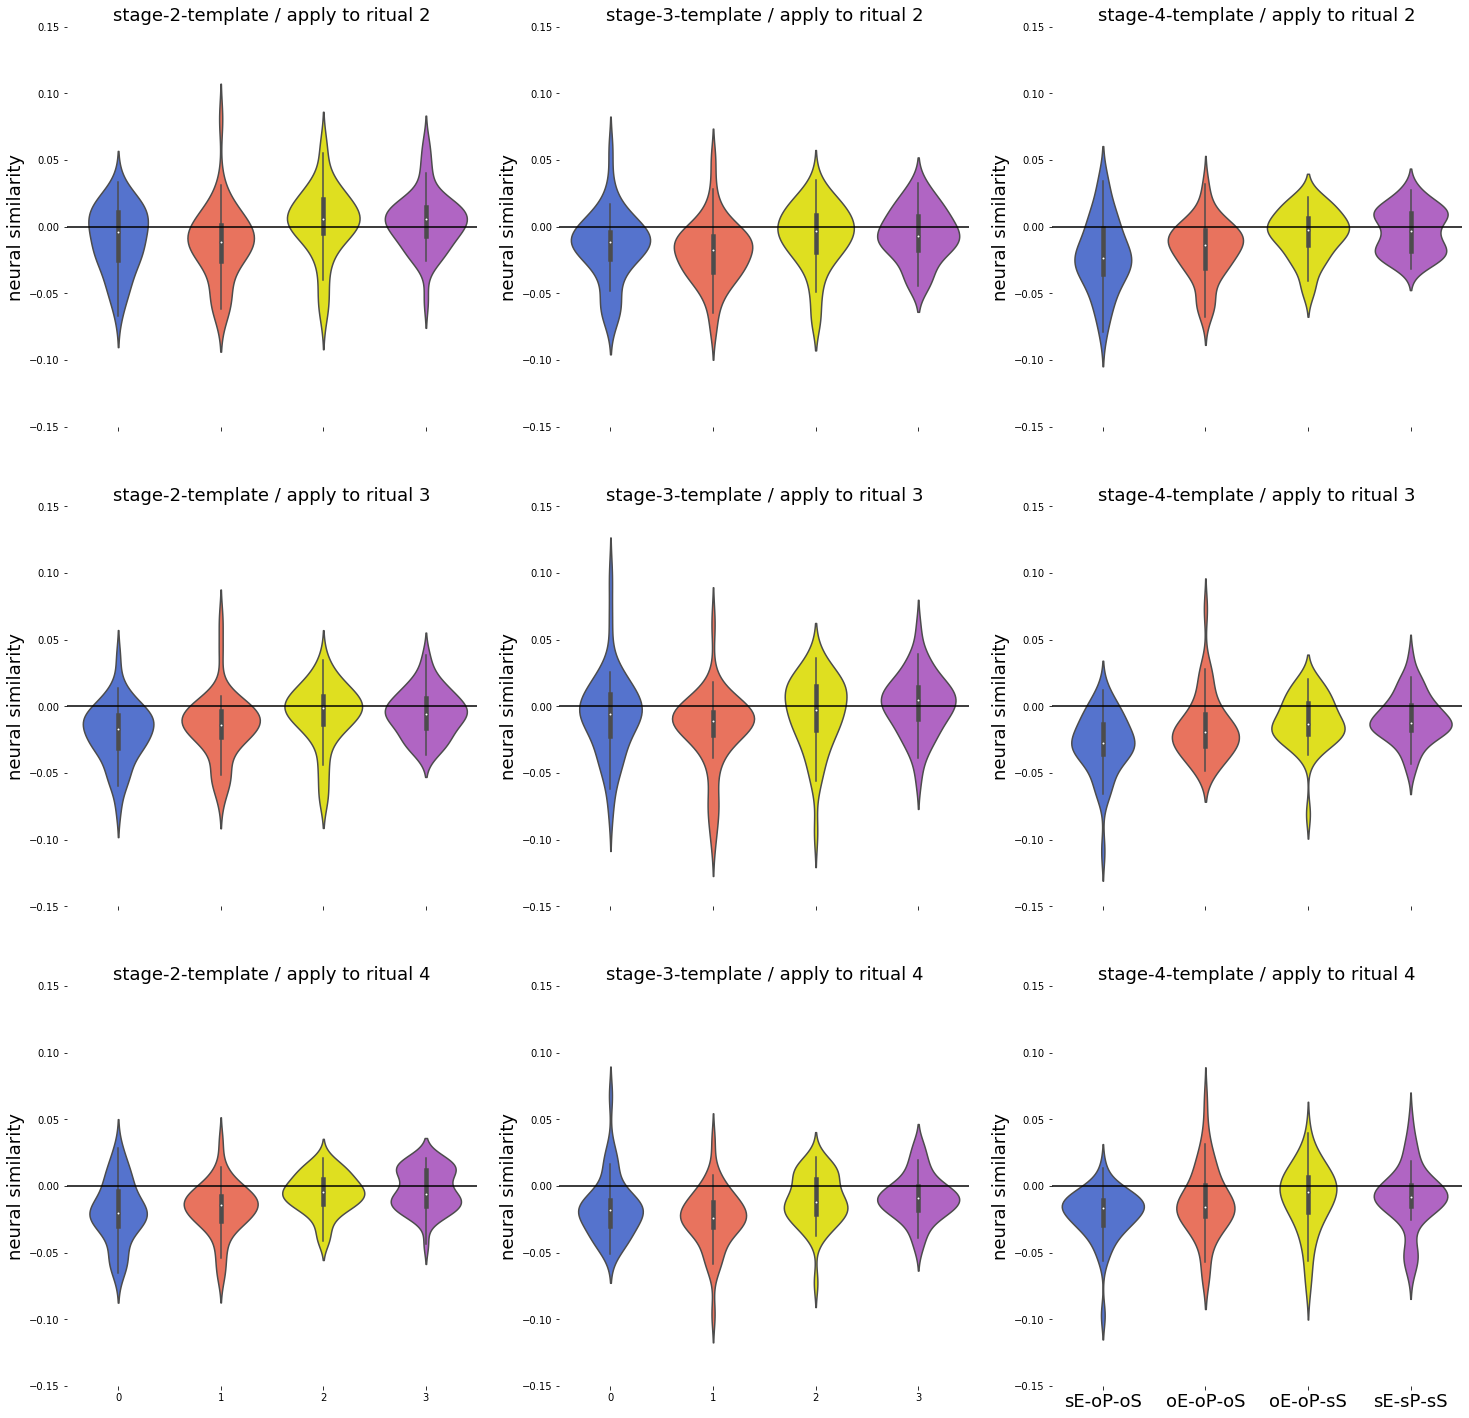

In [6]:
ylims = [-0.15, 0.15]

plt.figure(figsize=(25,25))
  
plt.subplot(3,3, 1)
plt.title("stage-2-template / apply to ritual 2", fontsize=18)

set_of_Columns = [sameOtherMean[0], 
                  otherOtherMean[0],
                  otherSameMean[0],
                  sameSameMean[0]]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()

# set_of_Columns2 = set_of_Columns2.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns2.to_csv(output_dir + 'K5' + str(cluster_id) + '_e2templ_e2.csv')

seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims) 
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 4)
plt.title("stage-2-template / apply to ritual 3", fontsize=18)

set_of_Columns = [sameOtherMean[3], 
                  otherOtherMean[3],
                  otherSameMean[3],
                  sameSameMean[3]]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()

# set_of_Columns2 = set_of_Columns2.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns2.to_csv(output_dir + 'K5' + str(cluster_id) + '_e2templ_e3.csv')

seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 7)
plt.title("stage-2-template / apply to ritual 4", fontsize=18)

set_of_Columns = [sameOtherMean[6], 
                  otherOtherMean[6],
                  otherSameMean[6],
                  sameSameMean[6]]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)




plt.subplot(3,3, 2)
plt.title("stage-3-template / apply to ritual 2", fontsize=18)

set_of_Columns = [sameOtherMean[1], 
                  otherOtherMean[1],
                  otherSameMean[1],
                  sameSameMean[1]]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()

# set_of_Columns2 = set_of_Columns2.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns2.to_csv(output_dir + 'K5' + str(cluster_id) + '_e3templ_e2.csv')

seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 5)
plt.title("stage-3-template / apply to ritual 3", fontsize=18)

set_of_Columns = [sameOtherMean[4], 
                  otherOtherMean[4],
                  otherSameMean[4],
                  sameSameMean[4]]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()


# set_of_Columns2 = set_of_Columns2.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns2.to_csv(output_dir + 'K5' + str(cluster_id) + '_e3templ_e3.csv')

seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 8)
plt.title("stage-3-template / apply to ritual 4", fontsize=18)

set_of_Columns = [sameOtherMean[7], 
                  otherOtherMean[7],
                  otherSameMean[7],
                  sameSameMean[7]]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)




plt.subplot(3,3, 3)
plt.title("stage-4-template / apply to ritual 2", fontsize=18)

set_of_Columns = [sameOtherMean[2], 
                  otherOtherMean[2],
                  otherSameMean[2],
                  sameSameMean[2]]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 6)
plt.title("stage-4-template / apply to ritual 3", fontsize=18)

set_of_Columns = [sameOtherMean[5], 
                  otherOtherMean[5],
                  otherSameMean[5],
                  sameSameMean[5]]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 9)
plt.title("stage-4-template / apply to ritual 4", fontsize=18)

set_of_Columns = [sameOtherMean[8], 
                  otherOtherMean[8],
                  otherSameMean[8],
                  sameSameMean[8]]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)

plt.xticks([0,1,2,3], ["sE-oP-oS", 
                       "oE-oP-oS", 
                       "oE-oP-sS", 
                       "sE-sP-sS"], fontsize=18)

# save plot as .eps file
# plt.savefig(output_dir + ROI_name + '_cluster_'+ str(cluster_id) + '_violin_appendixFigure.eps')
